# Libraries

In [57]:
#libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics # Import scikit-learn metrics module for accuracy calculation
from sklearn.model_selection import GridSearchCV

import os
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sb

### Importing pre-split data

## 03 - Dataset

We have applied 4 methods of re-sampling in a separate python notebook within the main P1 repository. These methods are:
* 1. NearMiss Under-sampling.
* 2. SMOTE Over-sampling.
* 3. SMOTEENN.
* 4. SMOTETomek.

From there, we produced 6 separate files for each re-sampling method; being:
* X_train,
* X_test,
* X_val,
* Y_train,
* Y_test,
* Y_val.

Below, we import these files.

In [2]:
# Original (only split without sampling) 
X_train_original = pd.read_csv(r'X_train_original.csv')
X_test_original = pd.read_csv(r'X_test_original.csv')
X_val_original = pd.read_csv(r'X_val_original.csv')
y_train_original = pd.read_csv(r'y_train_original.csv')
y_test_original = pd.read_csv(r'y_test_original.csv')
y_val_original = pd.read_csv(r'y_val_original.csv')

# Near-miss undersampling datasets:
X_train_NM2 = pd.read_csv(r'X_train_NM2.csv')
X_test_NM2 = pd.read_csv(r'X_test_NM2.csv')
X_val_NM2 = pd.read_csv(r'X_val_NM2.csv')
y_train_NM2 = pd.read_csv(r'y_train_NM2.csv')
y_test_NM2 = pd.read_csv(r'y_test_NM2.csv')
y_val_NM2 = pd.read_csv(r'y_val_NM2.csv')

# SMOTE over-sampling datasets:
X_train_SMOTE = pd.read_csv(r'X_train_SMOTE.csv')
X_test_SMOTE = pd.read_csv(r'X_test_SMOTE.csv')
X_val_SMOTE = pd.read_csv(r'X_val_SMOTE.csv')
y_train_SMOTE = pd.read_csv(r'y_train_SMOTE.csv')
y_test_SMOTE = pd.read_csv(r'y_test_SMOTE.csv')
y_val_SMOTE = pd.read_csv(r'y_val_SMOTE.csv')

# SMOTEENN over-sampling datasets:
X_train_SMOTEENN = pd.read_csv(r'X_train_SMOTEENN.csv')
X_test_SMOTEENN = pd.read_csv(r'X_test_SMOTEENN.csv')
X_val_SMOTEENN = pd.read_csv(r'X_val_SMOTEENN.csv')
y_train_SMOTEENN = pd.read_csv(r'y_train_SMOTEENN.csv')
y_test_SMOTEENN = pd.read_csv(r'y_test_SMOTEENN.csv')
y_val_SMOTEENN = pd.read_csv(r'y_val_SMOTEENN.csv')

# SMOTETomek over-sampling datasets:
X_train_SMOTETomek = pd.read_csv(r'X_train_SMOTETomek.csv')
X_test_SMOTETomek = pd.read_csv(r'X_test_SMOTETomek.csv')
X_val_SMOTETomek = pd.read_csv(r'X_val_SMOTETomek.csv')
y_train_SMOTETomek = pd.read_csv(r'y_train_SMOTETomek.csv')
y_test_SMOTETomek = pd.read_csv(r'y_test_SMOTETomek.csv')
y_val_SMOTETomek = pd.read_csv(r'y_val_SMOTETomek.csv')

### GridSearch CV parameters

In [73]:
tree_para = {'criterion':['gini','entropy']
             ,'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30]
            ,'min_samples_leaf':[1,2,3,4,5,10]}
# splits

clf = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)

### 01 - NearMiss Under-sampling

In [59]:
absorbance_cols = [col for col in X_train_NM2.columns if 'fa' in col]
#print(list(df.columns))
print(absorbance_cols)
print(len(absorbance_cols))

['fa226', 'fa257', 'fa280', 'fa297', 'fa324', 'fa343', 'fa363', 'fa385', 'fa408', 'fa432', 'fa458', 'fa471', 'fa500', 'fa514', 'fa545', 'fa561', 'fa577', 'fa594', 'fa629', 'fa648', 'fa667', 'fa686', 'fa707', 'fa727', 'fa749', 'fa771', 'fa793', 'fa816', 'fa840', 'fa865', 'fa890', 'fa917', 'fa943', 'fa971', 'fa1000', 'fa1029', 'fa1059', 'fa1090', 'fa1122', 'fa1155', 'fa1189', 'fa1224', 'fa1259', 'fa1296', 'fa1334', 'fa1373', 'fa1414', 'fa1455', 'fa1498', 'fa1542', 'fa1587', 'fa1633', 'fa1681', 'fa1731', 'fa1781', 'fa1834', 'fa1887', 'fa1943', 'fa2000', 'fa2058', 'fa2118', 'fa2181', 'fa2244', 'fa2310', 'fa2378', 'fa2448', 'fa2519', 'fa2593', 'fa2669', 'fa2747', 'fa2828', 'fa2911', 'fa2996', 'fa3084', 'fa3174', 'fa3267', 'fa3363', 'fa3462', 'fa3563', 'fa3668', 'fa3775', 'fa3886', 'fa4000', 'fa4117', 'fa4237', 'fa4362', 'fa4489', 'fa4621', 'fa4756', 'fa4896', 'fa5039', 'fa5187', 'fa5339', 'fa5495', 'fa5656', 'fa5822', 'fa5993', 'fa6168', 'fa6349', 'fa6535', 'fa6727', 'fa6924', 'fa7127', 'fa

In [60]:
# changed to val
X_train_absorbance = X_train_NM2.iloc[:, X_train_NM2.columns.isin(absorbance_cols)]

X_test_absorbance = X_val_NM2.iloc[:, X_val_NM2.columns.isin(absorbance_cols)]

len(X_test_absorbance)

39

In [61]:
feature_cols = list(X_train_absorbance.columns.values.tolist())

len(feature_cols)

107

Feature Selection
Here, you need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

#### Building Decision Tree Model
Let's create a Decision Tree Model using Scikit-learn.

In [74]:
# Train Decision Tree Classifer
clf = clf.fit(X_train_absorbance, y_train_NM2)

#Predict the response for test dataset
y_pred = clf.predict(X_test_absorbance)

#### Evaluating Model
Let's estimate, how accurately the classifier or model can predict the type of cultivars. Accuracy can be computed by comparing actual test set values and predicted values.

In [75]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_val_NM2, y_pred))

Accuracy: 0.7435897435897436


#### Visualise Decision Tree
Can use Scikit-learn's export_graphviz function for display the tree within a Jupyter notebook. 

Need to install graphviz and pydotplus:
* conda install graphviz
* conda install -c conda-forge pydotplus


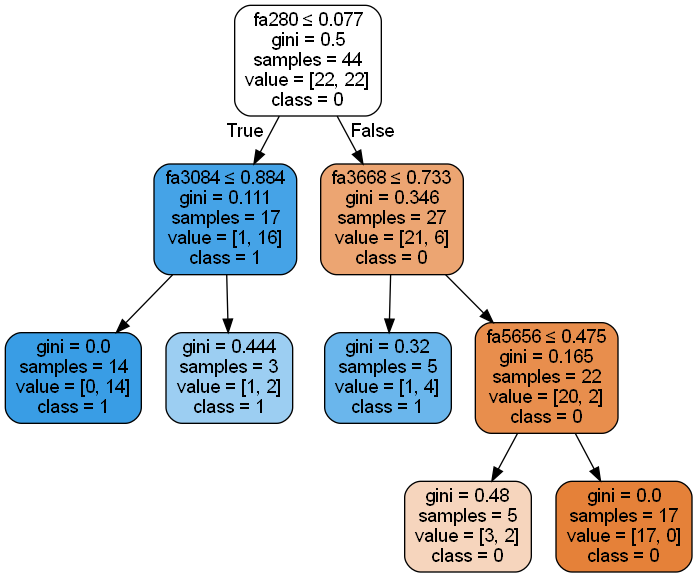

In [76]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()

export_graphviz(clf.best_estimator_
                ,out_file=dot_data
                ,filled=True
                ,rounded=True
                ,special_characters=True
                ,feature_names = feature_cols
                ,class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('freqs_only_tree.png')
Image(graph.create_png())

# still fa280 whether val as test or test as test.

### 01 - SMOTE over-sampling

In [77]:
absorbance_cols = [col for col in X_train_SMOTE.columns if 'fa' in col]
#print(list(df.columns))
print(len(absorbance_cols)) #should be 107 absorbance cols

107


In [78]:
X_train_absorbance = X_train_SMOTE.iloc[:, X_train_SMOTE.columns.isin(absorbance_cols)]

X_test_absorbance = X_val_SMOTE.iloc[:, X_val_SMOTE.columns.isin(absorbance_cols)]

In [79]:
feature_cols = list(X_train_absorbance.columns.values.tolist())

len(feature_cols)

107

Feature Selection
Here, you need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

#### Building Decision Tree Model
Let's create a Decision Tree Model using Scikit-learn.

In [80]:
# Train Decision Tree Classifer
clf = clf.fit(X_train_absorbance,y_train_SMOTE)

#Predict the response for test dataset
y_pred = clf.predict(X_test_absorbance)

#### Evaluating Model
Let's estimate, how accurately the classifier or model can predict the type of cultivars. Accuracy can be computed by comparing actual test set values and predicted values.

In [81]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_val_SMOTE, y_pred))

# 0.79 to 0.82 with val

Accuracy: 0.9230769230769231


#### Visualise Decision Tree
Can use Scikit-learn's export_graphviz function for display the tree within a Jupyter notebook. 

Need to install graphviz and pydotplus:
* conda install graphviz
* conda install -c conda-forge pydotplus


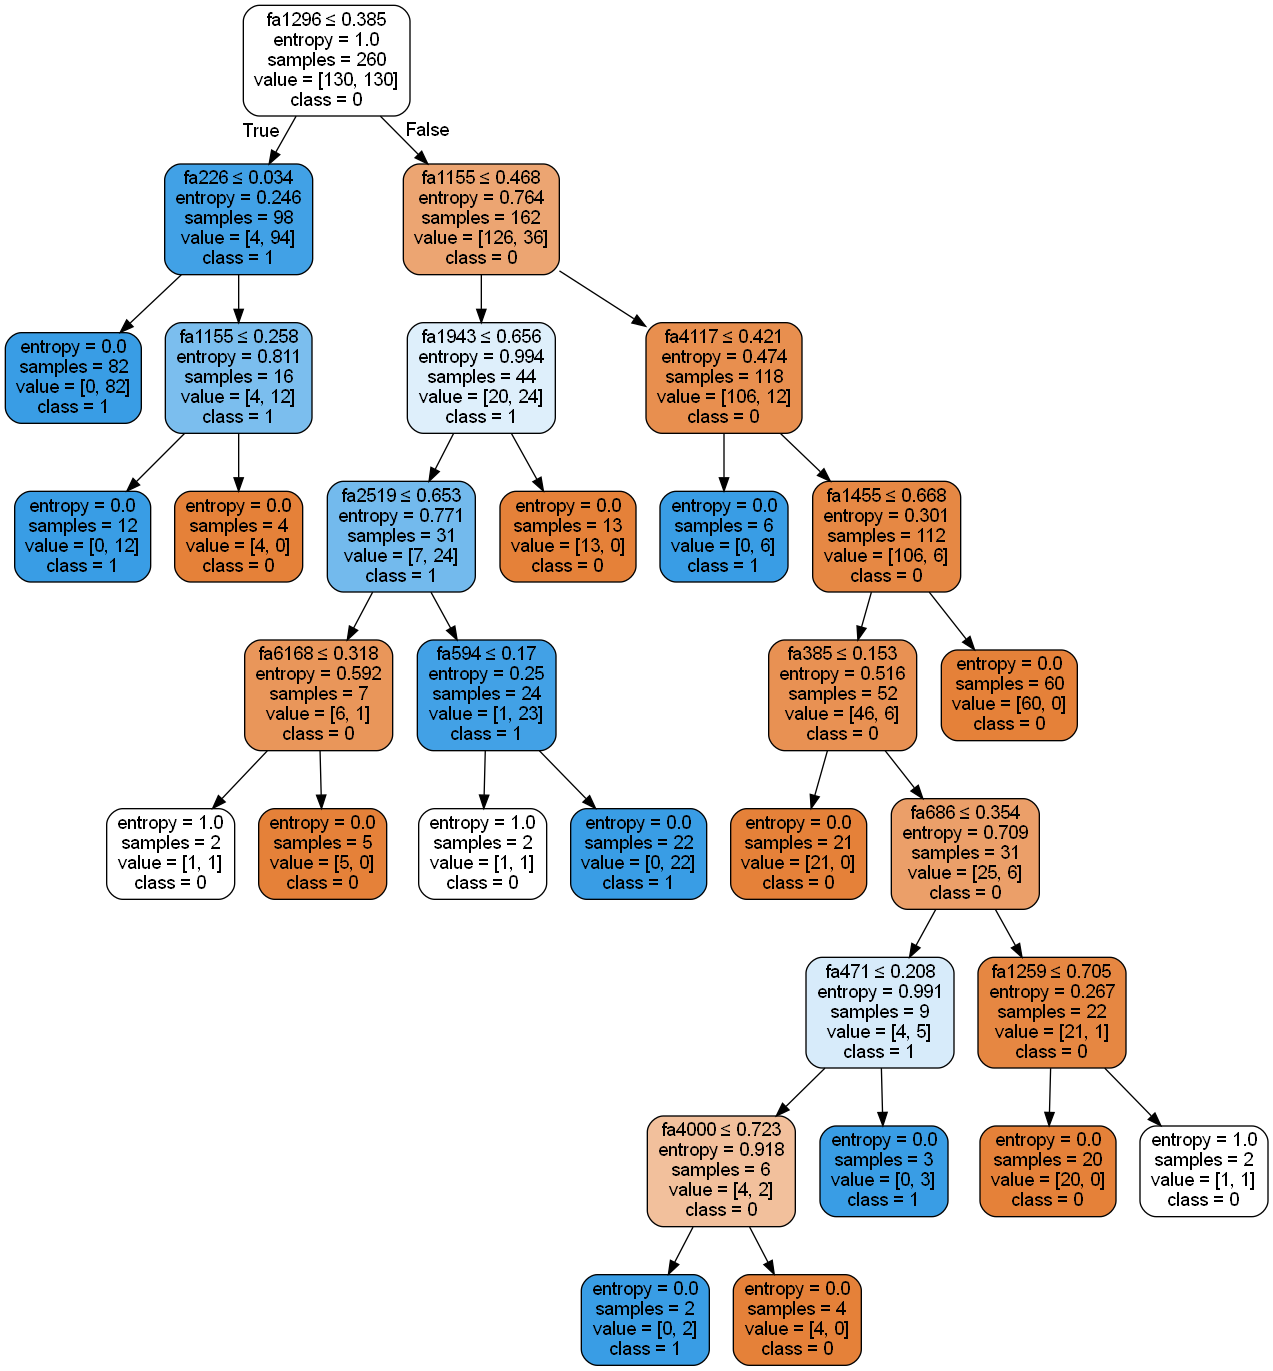

In [82]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()

export_graphviz(clf.best_estimator_
                ,out_file=dot_data
                ,filled=True
                ,rounded=True
                ,special_characters=True
                ,feature_names = feature_cols
                ,class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('freqs_only_tree.png')
Image(graph.create_png())

### 01 - SMOTEENN over-sampling

In [83]:
absorbance_cols = [col for col in X_train_SMOTEENN.columns if 'fa' in col]
#print(list(df.columns))
print(len(absorbance_cols)) #107

107


In [84]:
X_train_absorbance = X_train_SMOTEENN.iloc[:, X_train_SMOTEENN.columns.isin(absorbance_cols)]

X_test_absorbance = X_val_SMOTEENN.iloc[:, X_val_SMOTEENN.columns.isin(absorbance_cols)]

In [85]:
feature_cols = list(X_train_absorbance.columns.values.tolist())

len(feature_cols)

107

Feature Selection
Here, you need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

#### Building Decision Tree Model
Let's create a Decision Tree Model using Scikit-learn.

In [86]:
# Train Decision Tree Classifer
clf = clf.fit(X_train_absorbance,y_train_SMOTEENN)

#Predict the response for test dataset
y_pred = clf.predict(X_test_absorbance)

#### Evaluating Model
Let's estimate, how accurately the classifier or model can predict the type of cultivars. Accuracy can be computed by comparing actual test set values and predicted values.

In [88]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_val_SMOTEENN, y_pred))

Accuracy: 0.8461538461538461


#### Visualise Decision Tree
Can use Scikit-learn's export_graphviz function for display the tree within a Jupyter notebook. 

Need to install graphviz and pydotplus:
* conda install graphviz
* conda install -c conda-forge pydotplus


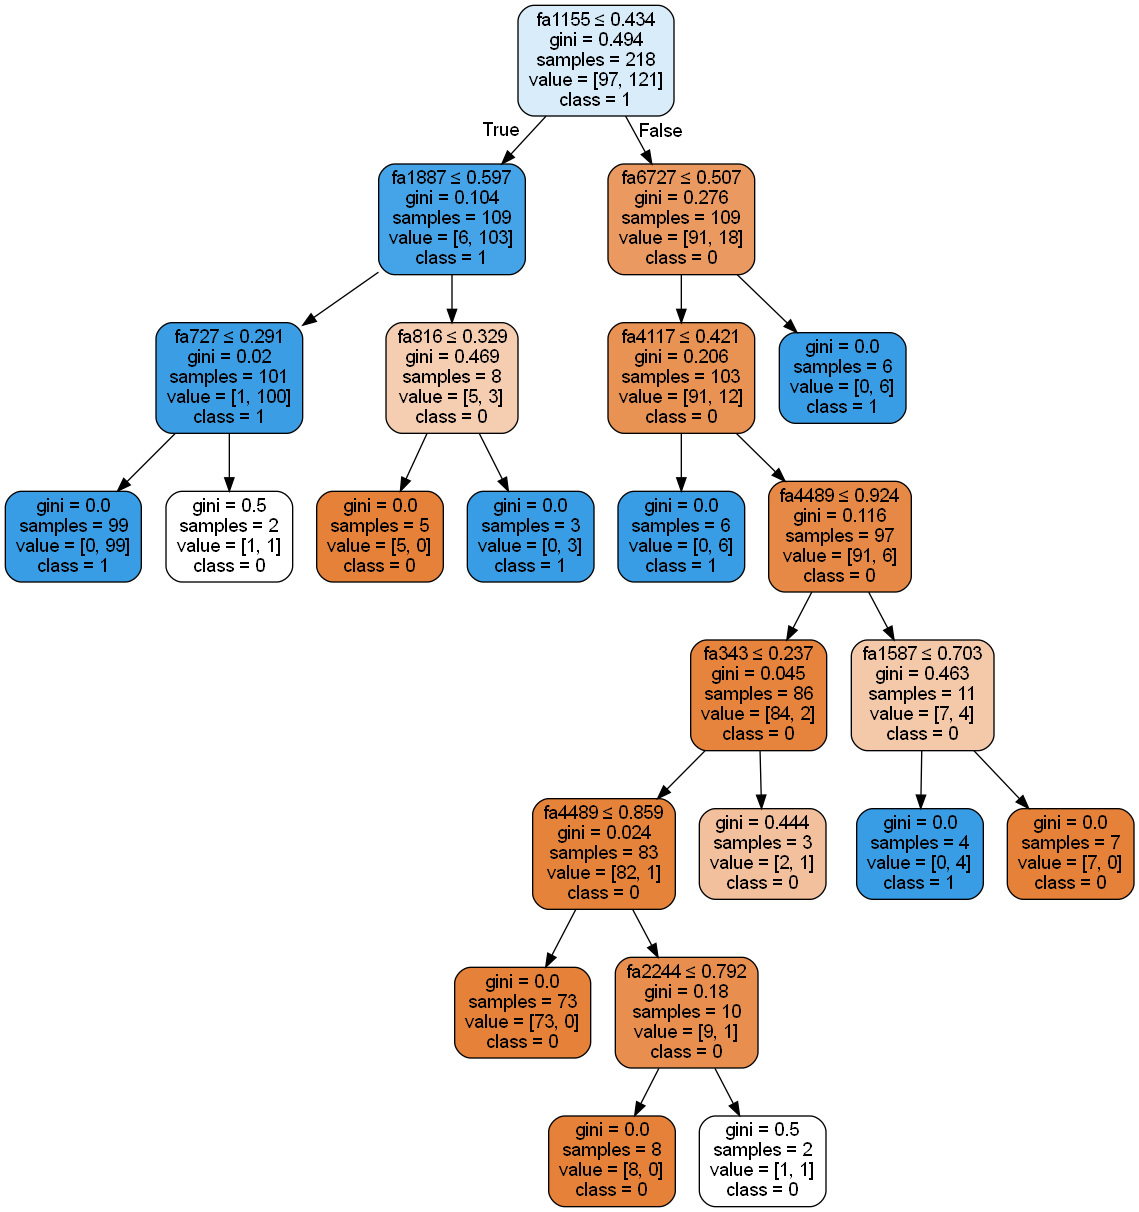

In [89]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()

export_graphviz(clf.best_estimator_
                ,out_file=dot_data
                ,filled=True
                ,rounded=True
                ,special_characters=True
                ,feature_names = feature_cols
                ,class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('freqs_only_tree.png')
Image(graph.create_png())

# fa1189 no change.

### 01 - SMOTETomek over-sampling

In [90]:
absorbance_cols = [col for col in X_train_SMOTETomek.columns if 'fa' in col]
#print(list(df.columns))
print(len(absorbance_cols)) # should be 107

107


In [91]:
X_train_absorbance = X_train_SMOTETomek.iloc[:, X_train_SMOTETomek.columns.isin(absorbance_cols)]

X_test_absorbance = X_val_SMOTETomek.iloc[:, X_val_SMOTETomek.columns.isin(absorbance_cols)]

In [92]:
feature_cols = list(X_train_absorbance.columns.values.tolist())

len(feature_cols)

107

Feature Selection
Here, you need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

#### Building Decision Tree Model
Let's create a Decision Tree Model using Scikit-learn.

In [93]:
# Train Decision Tree Classifer
clf = clf.fit(X_train_absorbance,y_train_SMOTETomek)

#Predict the response for test dataset
y_pred = clf.predict(X_test_absorbance)

#### Evaluating Model
Let's estimate, how accurately the classifier or model can predict the type of cultivars. Accuracy can be computed by comparing actual test set values and predicted values.

In [95]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_val_SMOTETomek, y_pred))

Accuracy: 0.8974358974358975


#### Visualise Decision Tree
Can use Scikit-learn's export_graphviz function for display the tree within a Jupyter notebook. 

Need to install graphviz and pydotplus:
* conda install graphviz
* conda install -c conda-forge pydotplus


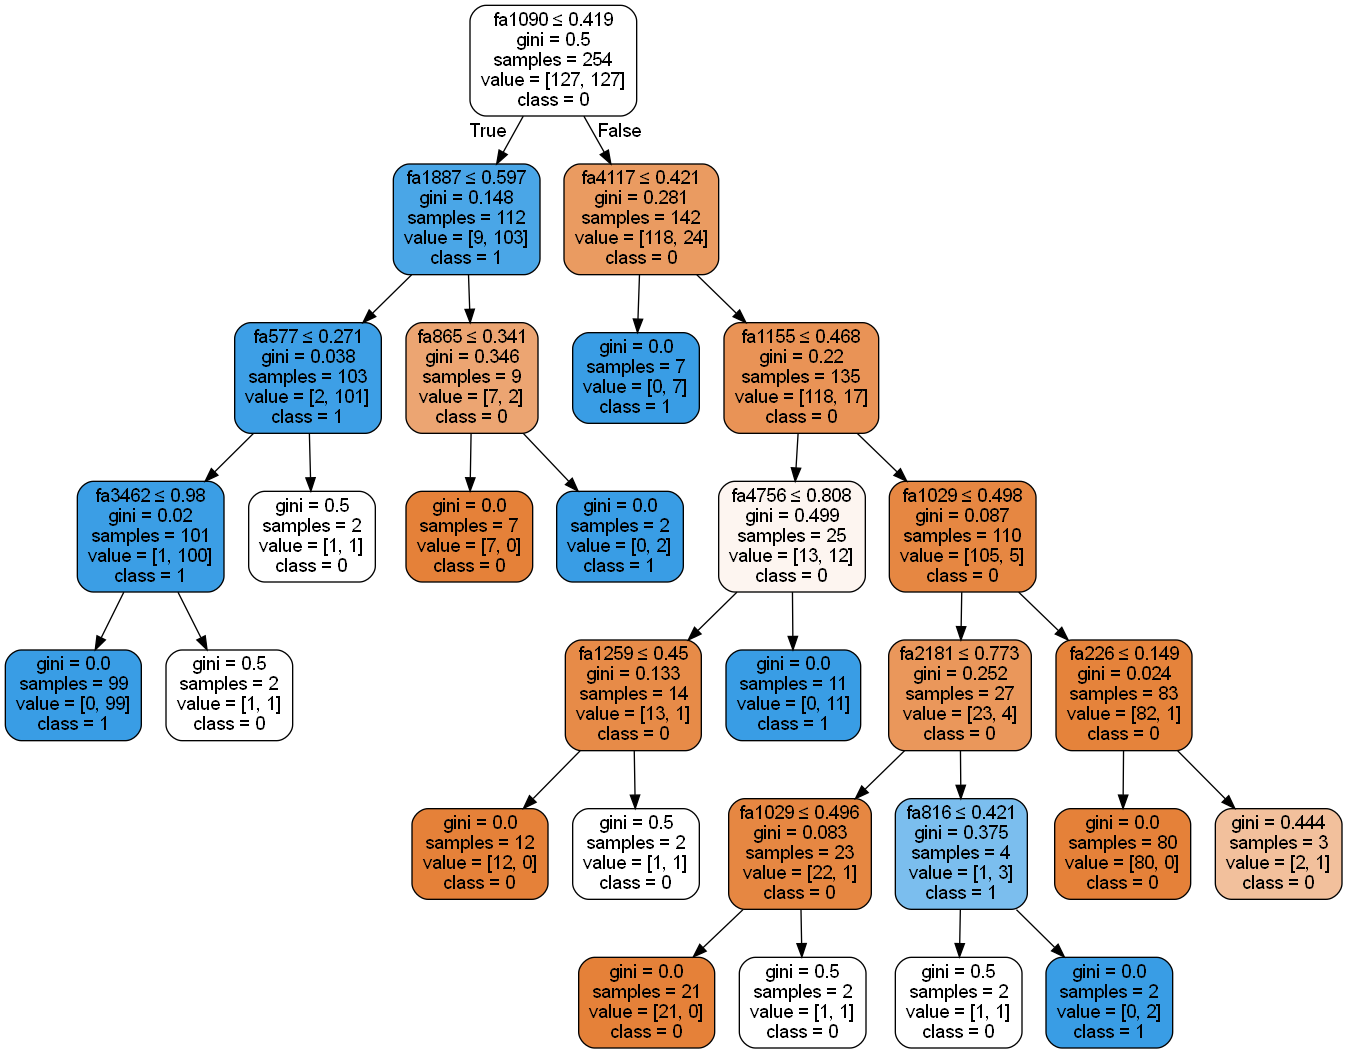

In [96]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()

export_graphviz(clf.best_estimator_
                ,out_file=dot_data
                ,filled=True
                ,rounded=True
                ,special_characters=True
                ,feature_names = feature_cols
                ,class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('freqs_only_tree.png')
Image(graph.create_png())

# fa1090 as both.